## SOcial ANalysis (SOAN)

**Goal**  
On 17 August 2018,I married the woman of my dreams. In order to know just how special she was (and is) to me I decided to put my data science skills to work. I analysed whatsapp data and all of our pictures that we made together. The end product was a small book that included results of this notebook with descriptions of all analyses that were done. I gave it to her the day before we married as to show what she means to me. 

**Project**  
The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the group chat. Personally, the most interesting analysis I have done in this project was using TF-IDF as a way to extract words that characterize each person in the group chat. It is interesting to see which words are often used by one person, but rarely by all others. 

Use the table of contents below to go to the analysis of your interest. 

## <a name="table">Table of Contents</a> 

1. [Functions](#functions)

2. [General Statistics](#general)  

    2.1 [Prepare Data](#gs-data)  
        
    2.2 [Users in the Group](#users)
    
    2.3 [Messages over time](#gs-messages)  
    
    2.4 [Active Moments](#gs-active) 
    
    2.5 [Averages / Summaries](#gs-averages) 
    
    2.6 [Response Time](#gs-response) 
    
3. [TF-IDF](#tfidf)  

    3.1 [Count Vector](#tf-count)  

    3.2 [Unique Words](#tf-unique)  

    3.3 [Plot Image](#tf-image)  

4. [Emoji Analysis](#emoji)  

    4.1 [Prepare Data](#emoji-prepare)  

    4.2 [Unique and Common Emojis](#emoji-stats)  

    4.3 [Correlation Matrix](#emoji-corr)  
    
5. [Topic Modelling](#topic)  

    5.1 [Prepare Data](#topic-prepare)  

    5.2 [LDA](#topic-lda)  

    5.3 [NMF](#topic-nmf)  
    
6. [Sentiment Analysis](#sentiment)  

    6.1 [Prepare Data](#sentiment-prepare)  

    6.2 [Average Sentiment](#sentiment-average)  
    
    6.3 [Plot Sentiment](#sentiment-plot)  
    
7. [Word Clouds](#cloud)  

    7.1 [Prepare Data](#cloud-prepare)  

    7.2 [Masked Word Cloud](#cloud-mask)  

    7.3 [Sentiment-based Word Cloud](#cloud-sentiment) 
    
8. [Color Analysis](#color)  

    8.1 [Extract Frequent Colors (k-Means)](#color-get)  

    8.2 [Plot Frequent Colors](#color-plot)  

## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

I purposefully imported all packages manually just to show you which are which and how they work. 

In [35]:
!pip install emoji
!pip install palettable
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 1.1 MB/s            


In [1]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Marius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Marius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a name="general">2. General Statistics</a> 
[Back to Table of Contents](#table)

Here you can find general data with regards to whatsapp conversations such as the number of messages and words. Keep in mind this is simply to get a general understanding of the conversations. More complex and interesting information can be found in the later chapters. 

#### <a name="gs-data">2.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [2]:
df = helper.import_data('/Users/Marius/Downloads/WhatsApp/_chat.txt')
df

,index,Message_Raw,User
0,0,‎[23/05/2017 13:21:37] Maria Perez Suarez: ‎< ...,Maria Perez Suarez
1,1,[23/05/2017 15:48:06] Maria Perez Suarez: ‎Les...,Maria Perez Suarez
2,2,‎[23/05/2017 22:04:19] Maria Perez Suarez: ‎< ...,Maria Perez Suarez
3,3,‎[23/05/2017 22:05:14] Maria Perez Suarez: ‎< ...,Maria Perez Suarez
4,4,[25/05/2017 16:48:31] Maria Perez Suarez: desc...,Maria Perez Suarez
...,...,...,...
7081,3100,‎[20/10/2021 17:40:49] Marius: ‎< pièce jointe...,Marius
7082,3101,"[20/10/2021 20:21:43] Marius: Suis devant, t’e...",Marius
7083,3102,[20/10/2021 20:26:44] Marius: Ok je t’attends ...,Marius
7084,3103,[20/10/2021 20:27:47] Marius: Le bar\n,Marius


In [3]:
df = helper.preprocess_data(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Her', 'Me'])}
    df.User = df.User.map(user_labels)

In [4]:
df

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
36,36,[01/06/2017 10:58:21] Maria Perez Suarez: 4 dé...,Maria Perez Suarez,4 déjà!,dj,2017-01-06 10:58:21,10,4
37,37,[01/06/2017 10:58:48] Maria Perez Suarez: La p...,Maria Perez Suarez,La première (et dernière) fois qu'on a fait dè...,la premire et dernire fois quon a fait ds maca...,2017-01-06 10:58:48,10,4
3997,16,[01/06/2017 11:00:17] Marius: 🤓\n,Marius,🤓,,2017-01-06 11:00:17,11,4
4047,66,[01/07/2017 19:17:37] Marius: Gueta est inquie...,Marius,Gueta est inquiet de ta non présence,gueta est inquiet de ta non prsence,2017-01-07 19:17:37,19,5
98,98,[01/07/2017 19:40:23] Maria Perez Suarez: et t...,Maria Perez Suarez,et toi ?,et toi,2017-01-07 19:40:23,19,5
...,...,...,...,...,...,...,...,...
7026,3045,[12/08/2021 13:46:53] Marius: Lol\n,Marius,Lol,lol,2021-12-08 13:46:53,13,2
7027,3046,[12/08/2021 13:47:17] Marius: C’était le chien...,Marius,C’était le chien de baptiste,ctait le chien de baptiste,2021-12-08 13:47:17,13,2
7028,3047,[12/08/2021 13:47:21] Marius: 😂\n,Marius,😂,,2021-12-08 13:47:21,13,2
3893,3893,[12/08/2021 13:47:26] Maria Perez Suarez: oui ...,Maria Perez Suarez,oui bon,oui bon,2021-12-08 13:47:26,13,2


#### <a name="users">2.2 Users in the group</a> 
[Back to Table of Contents](#table)

In [5]:
general.print_users(df)

#############
##  Users  ##
#############

Maria Perez Suarez
Marius


In [6]:
user = "Maria Perez Suarez"
language = "french"

#### <a name="gs-messages">2.3 Messages over time</a> 
[Back to Table of Contents](#table)

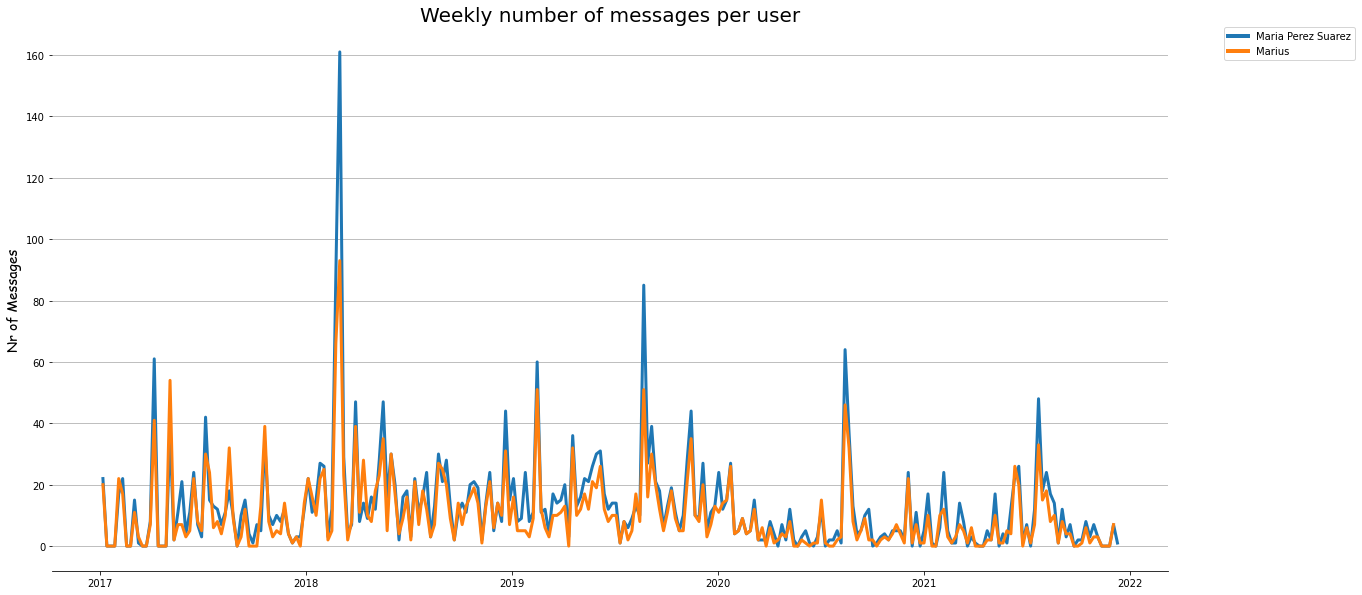

In [7]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a name="gs-active">2.4 Active Moments</a> 
[Back to Table of Contents](#table)

**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

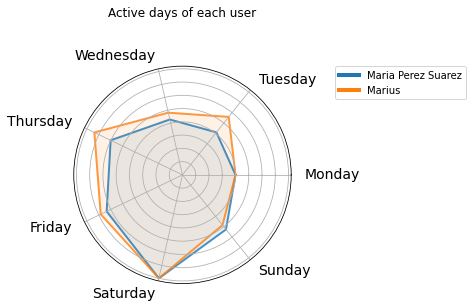

In [8]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

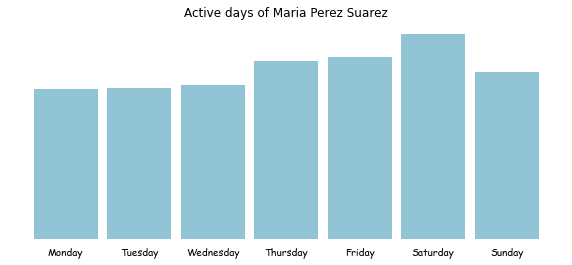

In [9]:
general.plot_active_days(df, savefig=False, dpi=100, user=user)

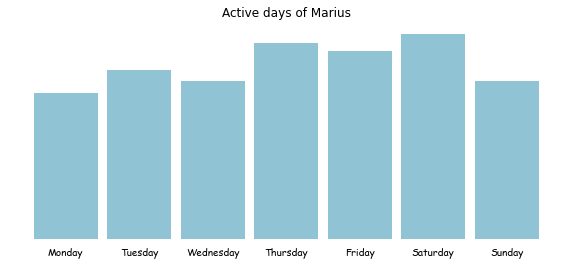

In [10]:
general.plot_active_days(df, savefig=False, dpi=100, user="Marius")

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

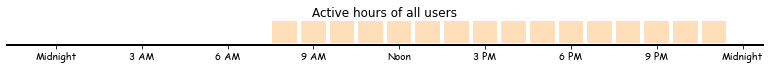

In [11]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

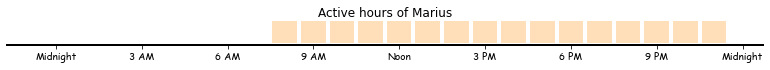

In [12]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='Marius')

**Calendar Map**  
Here you can choose for which year you want to see the activity

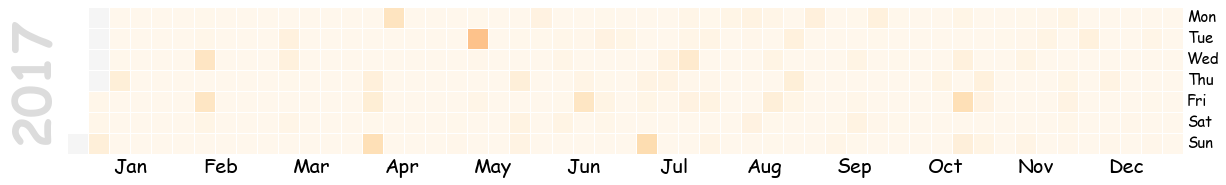

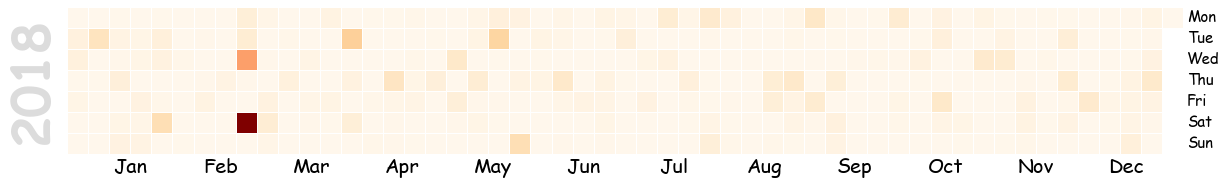

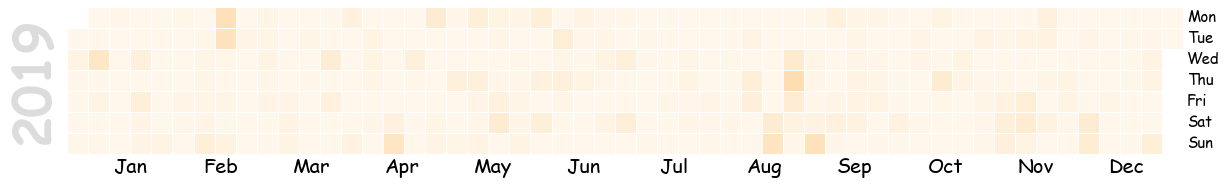

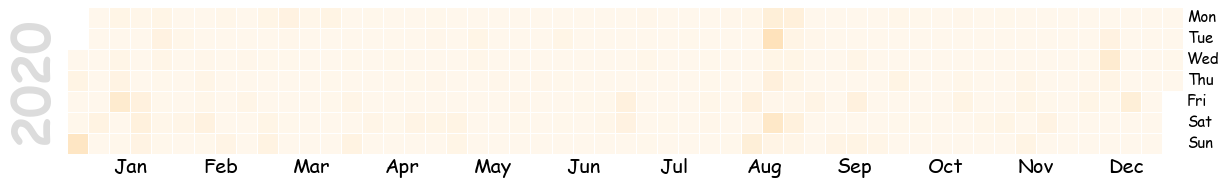

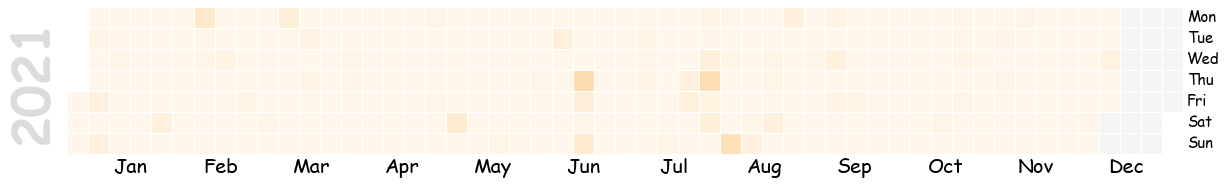

In [13]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#### <a name="gs-averages">2.5 Averages / Summaries</a> 
[Back to Table of Contents](#table)

Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [14]:
general.print_stats(df, love=True)

##########################
##  Number of Messages  ##
##########################

3349	Maria Perez Suarez
2643	Marius

#######################
##  Number of Words  ##
#######################

14773	Maria Perez Suarez
11150	Marius

#########################
##  Messages per hour  ##
#########################

Maria Perez Suarez:	0.07755725897964383
Marius:	0.06127985161140737

################################
##  Avg nr Words per Message  ##
################################

Maria Perez Suarez: 4.41
Marius: 4.22

#############################
##  Avg length of Message  ##
#############################

Maria Perez Suarez: 19.94
Marius: 19.31

##############################
##  Highscore Day per User  ##
##############################

Maria Perez Suarez
Messages: 	159
Day: 		2018-03-03

Marius
Messages: 	89
Day: 		2018-03-03

########################################
##  How often user said "I love you"  ##
########################################

Maria Perez Suarez:           18
Marius

#### <a name="gs-response">2.6 Response Time</a> 
[Back to Table of Contents](#table)

**keep_order = True** maintains the order of messages in the dataframe which is neccesary in order to calculate the response time between messages. However, it is more time-consuming which is why I created a separate function for this. 

In [15]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Maria Perez Suarez:           23.89
Marius:                       20.87

##############################
##  Nr. Initiated Messages  ##
##############################

Maria Perez Suarez:           111		(3.31% of all messages)
Marius:                       116		(4.39% of all messages)


## <a name="tfidf">3. TF-IDF</a> 
[Back to Table of Contents](#table)

#### <a name="tf-count">3.1 Create Count Vector</a> 
[Back to Table of Contents](#table)

It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [16]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")

#### <a name="tf-unique">3.2 Unique Words</a> 
[Back to Table of Contents](#table)

Below you can see three version of TF-IDF that I created. After much experimentation it turns out that they are all quite similar and that Version C gives me a nice distribution of values needed for the plotting. Content-wise they all have a very similar meaning. 

**Version A - Messages**  
  
$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} m_i}{m_i} $  
  
$t_{ij} = $ Number of times word $j$ said by $i$   
$m_i = $ Number of messages texted by $i$  
  

**Version B - Words**

$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} w_i}{w_i}$

$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$w_i = $ Number of words texted by $i$


**Version C - Adjusted TF-IDF**

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$m = $ Number of all messages   

** Unique Words **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $


In [17]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

#### <a name="tf-image">3.3 Plot Image</a> 
[Back to Table of Contents](#table)

This is where things got a bit tricky...

I created a horizontal bar chart with two bars stacked on top of each other both plotted on a background image. I started with a background image and plotted the actual values on the left and made it fully transparent with a white border to separate the bars. Then, on top of that I plotted which bars so that the right part of the image would get removed. 

In [18]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Maria Perez Suarez
Marius


**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

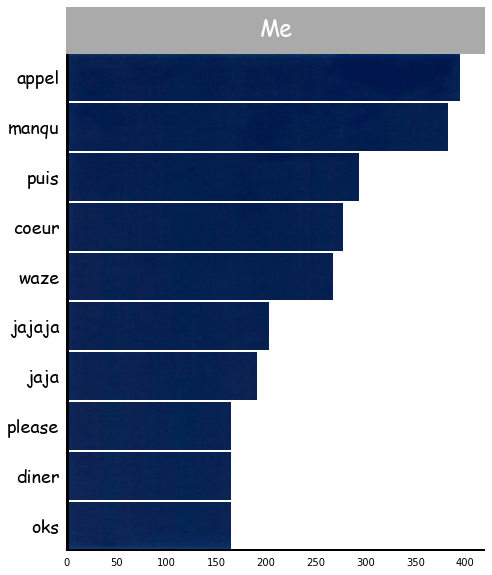

In [26]:
tf_idf.plot_unique_words(unique_words, 
                         user='Maria Perez Suarez', 
                         image_path='../images/mask.png', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Maria Perez Suarez", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

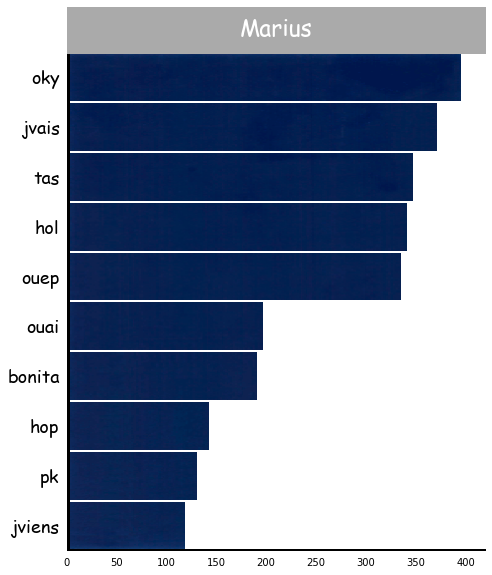

In [27]:
tf_idf.plot_unique_words(unique_words, 
                         user='Marius', 
                         image_path='../images/mask.png', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Marius", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

## <a name="emoji">4. Emoji Analysis</a> 
[Back to Table of Contents](#table)

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

#### <a name="emoji-prepare">4.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data needs to be prepared as follows:
* Three new columns are created:
    * *Emoji* contains all emojis in a message
    * *Emoji_Counts* counts the number of emojis in a message
    * *Different_Emojis* extracts them in a list for handling purposes
* *counts* is a dictionary of dictionaries containing the count of each emoji per user
* *unique_emoji* is a dict of dicts containing a uniqueness score of each emoji per user compared to other users

In [28]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a name="emoji-stats">4.2 Unique and Common Emoji</a> 
[Back to Table of Contents](#table)

Below you can find the most unique emojis according to the TF-IDF and Unique formulas that were used previously: 

** TF-IDF **

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific emoji $j$ was said by $i$  
$m = $ Number of all messages  

** Unique Emoji **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $

I purposefully based it on the number of words and messages in total and only changed *t* to the number of times emoji was said

In [29]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Maria Perez Suarez
:-) 9.471044776119404
:( 7.89253731343283
XD 1.5785074626865672

Marius
:D 8.869137670196666
;-) 5.068078668683811
=D 3.8010590015128587

#########################
### Most Common Emoji ###
#########################

Maria Perez Suarez
:/ 59
:-) 11
:( 9

Marius
:/ 56
:D 6
;-) 3



**NOTE:** The often used emoji does not always properly get displayed in matplotlib plots, not sure how to fix this currently...

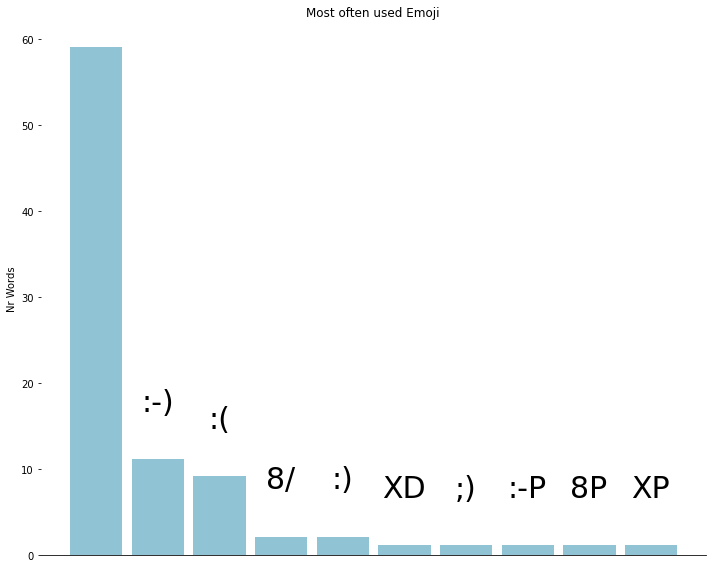

In [30]:
emoji.plot_counts(counts, user = user)

#### <a name="emoji-corr">4.3 Correlation Matrix</a> 
[Back to Table of Contents](#table)

Below you find a correlation matrix of the 15 most often used emoji by a single user. The reasoning for only taking 15 emojis is that otherwise the matrix simply becomes too big. 

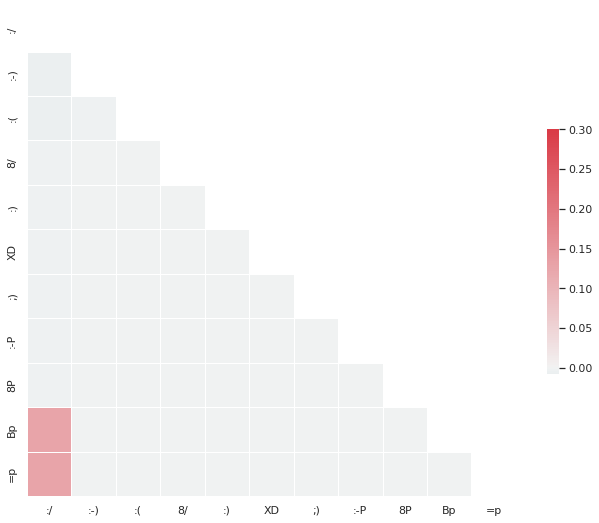

In [31]:
emoji.plot_corr_matrix(df, user, list_of_words, counts)

## <a name="topic">5. Topic Modelling</a> 
[Back to Table of Contents](#table)

#### <a name="topic-prepare">5.1 Prepare Data</a> 
[Back to Table of Contents](#table)


#### <a name="topic-lda">5.2 LDA </a> 
[Back to Table of Contents](#table)

There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF which is why I used that. It should be noted that Gensim is also an extremely good package when it comes to NLP. I will be using Gensim later below for a different application. 

In [32]:
topic.topics(df, model='lda', language="french")

##########################
### Maria Perez Suarez ###
##########################



/Users/Marius/anaconda3/envs/startuplynx2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topics in lda model:
Topic #0: fait faire trop dit quand temps arrive
Topic #1: bisous lol si va voir vais veux
Topic #2: ok bien plus viens fais cest quoi
Topic #3: stp merci peux soir jarrive peu jai
Topic #4: oui coucou cest bon bonne jai coeur

##############
### Marius ###
##############


Topics in lda model:
Topic #0: coucou faire jai jvais yep merci coup
Topic #1: lol bonne bisous nuit belle plus non
Topic #2: ok cest bien va si fait ca
Topic #3: hol oui ouai quand oky hola hop
Topic #4: bon peux tas ben yo apptit vol



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [33]:
topic.topics(df, model='nmf', language="french")

##########################
### Maria Perez Suarez ###
##########################


Topics in nmf model:
Topic #0: ok merci bisous ah bon vais voit
Topic #1: oui ah jai vu dit bien bon
Topic #2: coucou coeur maison mange chez manger bien
Topic #3: lol voiture cest ah deja reunion pourquoi
Topic #4: bonne nuit bisous coeur amour journe gros

##############
### Marius ###
##############



/Users/Marius/anaconda3/envs/startuplynx2/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/Marius/anaconda3/envs/startuplynx2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Marius/anaconda3/envs/startuplynx2/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(



Topics in nmf model:
Topic #0: ok coup bien min cool tattends ah
Topic #1: lol cest mme ah non cool alors
Topic #2: bonne nuit belle journe soire princesse coeur
Topic #3: bon cest apptit vol ben app bien
Topic #4: bisous gros belle taime bien profite damour



## <a name="sentiment">6. Sentiment</a> 
[Back to Table of Contents](#table)

#### <a name="sentiment-prepare">6.1 Prepare Data</a> 
[Back to Table of Contents](#table)

Fortunately, in order to extract sentiment from a Dutch message you can extract the score (-1 being negative and 1 being positive) easily using the pattern package. Below I extract the sentiment as a new column which is needed for further analysis. 

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

In [38]:
df

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week,avg_length_words,avg_length_charac,Date_only,Love,Response_Time,Sentiment
36,36,[01/06/2017 10:58:21] Maria Perez Suarez: 4 dé...,Maria Perez Suarez,4 déjà!,dj,2017-01-06 10:58:21,10,4,2,3,2017-01-06,0,NaT,0.0000
37,37,[01/06/2017 10:58:48] Maria Perez Suarez: La p...,Maria Perez Suarez,La première (et dernière) fois qu'on a fait dè...,la premire et dernire fois quon a fait ds maca...,2017-01-06 10:58:48,10,4,11,59,2017-01-06,0,0 days 00:00:27,0.0000
3997,16,[01/06/2017 11:00:17] Marius: 🤓\n,Marius,🤓,,2017-01-06 11:00:17,11,4,1,0,2017-01-06,0,0 days 00:01:29,-0.2960
4047,66,[01/07/2017 19:17:37] Marius: Gueta est inquie...,Marius,Gueta est inquiet de ta non présence,gueta est inquiet de ta non prsence,2017-01-07 19:17:37,19,5,7,35,2017-01-07,0,1 days 08:17:20,0.0000
98,98,[01/07/2017 19:40:23] Maria Perez Suarez: et t...,Maria Perez Suarez,et toi ?,et toi,2017-01-07 19:40:23,19,5,3,7,2017-01-07,0,0 days 00:22:46,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,3045,[12/08/2021 13:46:53] Marius: Lol\n,Marius,Lol,lol,2021-12-08 13:46:53,13,2,1,3,2021-12-08,0,0 days 01:09:05,0.4215
7027,3046,[12/08/2021 13:47:17] Marius: C’était le chien...,Marius,C’était le chien de baptiste,ctait le chien de baptiste,2021-12-08 13:47:17,13,2,5,26,2021-12-08,0,0 days 00:00:24,0.0000
7028,3047,[12/08/2021 13:47:21] Marius: 😂\n,Marius,😂,,2021-12-08 13:47:21,13,2,1,0,2021-12-08,0,0 days 00:00:04,0.4404
3893,3893,[12/08/2021 13:47:26] Maria Perez Suarez: oui ...,Maria Perez Suarez,oui bon,oui bon,2021-12-08 13:47:26,13,2,2,7,2021-12-08,0,0 days 00:00:05,0.0000


#### <a name="sentiment-average">6.2 Average Sentiment Per User</a> 
[Back to Table of Contents](#table)

Prints the average sentiment per user to get an indication of positivity of that user. 

*NOTE*: THIS ONLY WORKS FOR DUTCH!

In [37]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Maria Perez Suarez:           		0.093
Marius:                       		0.118





#### <a name="sentiment-plot">6.3 Plot Sentiment</a> 
[Back to Table of Contents](#table)

Below you can see a plot of how positive the messages are over time. The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

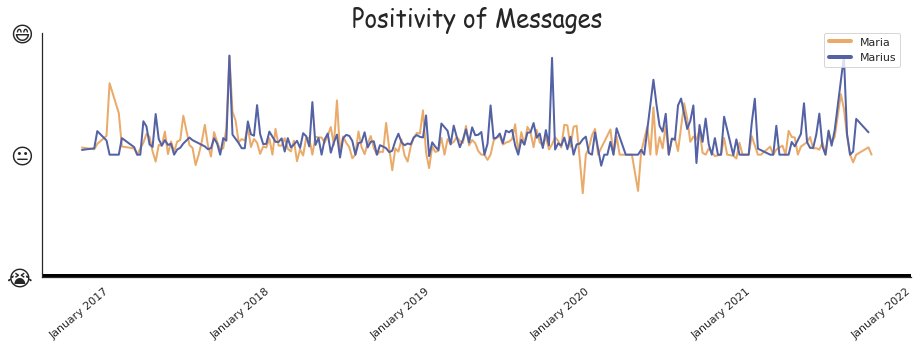

In [39]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

## <a name="cloud">7. Word Clouds</a> 
[Back to Table of Contents](#table)

#### <a name="cloud-prepare">7.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [40]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="french", column="Word")
words = counts[["Word", user]].set_index('Word').to_dict()[user]

#### <a name="cloud-mask">7.2 Masked Word Cloud</a> 
[Back to Table of Contents](#table)

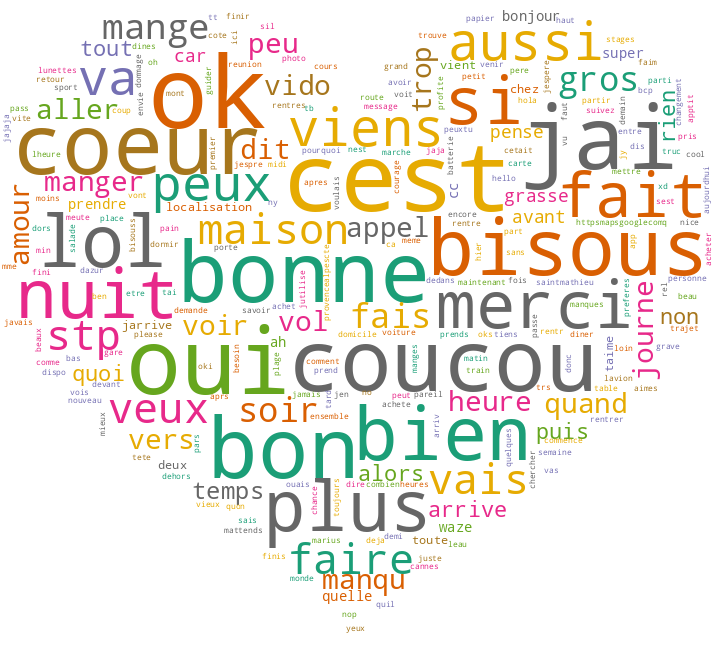

In [41]:
wordcloud.create_wordcloud(words,random_state=42, mask="../images/heart.jpg",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

## <a name="color">8. Picture Analysis</a> 
[Back to Table of Contents](#table)

NOTE: This is not part of the whatsapp data. For this chapter to work, you'll need to put at least 1 image in the folder 'Images/' or create a path of your own. It is set to not run automatically since this is merely an extra feature. Set run_colors to True if you want to run the script. 

#### <a name="color-get">8.1 Extract Frequent Colors (k-Means)</a> 
[Back to Table of Contents](#table)

In [ ]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [61]:
from tqdm import tqdm

extract_colors = True

if extract_colors:
    # Get Top 5 Frequent Colors
    path = '/Users/Marius/Downloads/WhatsApp/'
    all_colors = []
    for i in tqdm(os.listdir(path)):
        if i.endswith('.jpg'): #or i.endswith('.png') or i.endswith('.webp')
            try:
                all_colors.append(colors.get_common_colors(path + i))
            except Exception as e:
                print(e, i)
                pass

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

  1%|          | 5/890 [00:03<09:39,  1.53it/s]

image file is truncated (0 bytes not processed) 00006291-PHOTO-2020-11-21-17-29-43.jpg


  5%|▌         | 45/890 [00:36<12:53,  1.09it/s]

image file is truncated (0 bytes not processed) 00006305-PHOTO-2020-12-05-17-20-17.jpg


  6%|▌         | 50/890 [00:40<12:05,  1.16it/s]

image file is truncated (0 bytes not processed) 00006241-PHOTO-2020-11-01-15-42-31.jpg


 18%|█▊        | 156/890 [02:05<07:03,  1.73it/s]

image file is truncated (0 bytes not processed) 00006294-PHOTO-2020-11-25-15-36-25.jpg


 31%|███       | 272/890 [03:37<08:55,  1.15it/s]

image file is truncated (0 bytes not processed) 00006311-PHOTO-2020-12-14-22-13-30.jpg


 32%|███▏      | 286/890 [03:51<10:43,  1.07s/it]

image file is truncated (0 bytes not processed) 00006304-PHOTO-2020-12-05-17-20-17.jpg
image file is truncated (0 bytes not processed) 00006237-PHOTO-2020-11-01-15-39-23.jpg


 32%|███▏      | 289/890 [03:52<06:49,  1.47it/s]

image file is truncated (0 bytes not processed) 00006297-PHOTO-2020-12-05-08-01-13.jpg


 41%|████▏     | 369/890 [05:10<08:16,  1.05it/s]

image file is truncated (0 bytes not processed) 00006262-PHOTO-2020-11-15-10-52-14.jpg


 48%|████▊     | 428/890 [06:01<07:08,  1.08it/s]

image file is truncated (0 bytes not processed) 00006313-PHOTO-2020-12-14-22-13-58.jpg


 48%|████▊     | 430/890 [06:02<05:31,  1.39it/s]

image file is truncated (0 bytes not processed) 00006303-PHOTO-2020-12-05-17-20-16.jpg


 54%|█████▍    | 485/890 [06:48<05:30,  1.22it/s]

image file is truncated (0 bytes not processed) 00006244-PHOTO-2020-11-03-16-00-13.jpg


 71%|███████   | 630/890 [08:46<03:38,  1.19it/s]

image file is truncated (0 bytes not processed) 00006243-PHOTO-2020-11-01-15-42-32.jpg


 73%|███████▎  | 647/890 [08:59<02:57,  1.37it/s]

image file is truncated (0 bytes not processed) 00006240-PHOTO-2020-11-01-15-42-29.jpg


 81%|████████  | 719/890 [09:57<02:31,  1.13it/s]

image file is truncated (0 bytes not processed) 00006226-PHOTO-2020-10-31-18-29-06.jpg


 90%|█████████ | 801/890 [11:06<01:06,  1.34it/s]

image file is truncated (0 bytes not processed) 00006312-PHOTO-2020-12-14-22-13-44.jpg
image file is truncated (0 bytes not processed) 00006242-PHOTO-2020-11-01-15-42-32.jpg


 91%|█████████▏| 813/890 [11:15<01:04,  1.20it/s]

image file is truncated (0 bytes not processed) 00006233-PHOTO-2020-11-01-15-36-01.jpg


100%|██████████| 890/890 [12:14<00:00,  1.21it/s]


#### <a name="color-plot">8.2 Plot Frequent Colors</a> 
[Back to Table of Contents](#table)

After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

/Users/Marius/Documents/DEV/soan/notebooks/../soan/colors/colors.py:167: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  radii, bons = np.histogram(hlist, normed=1, bins=n)


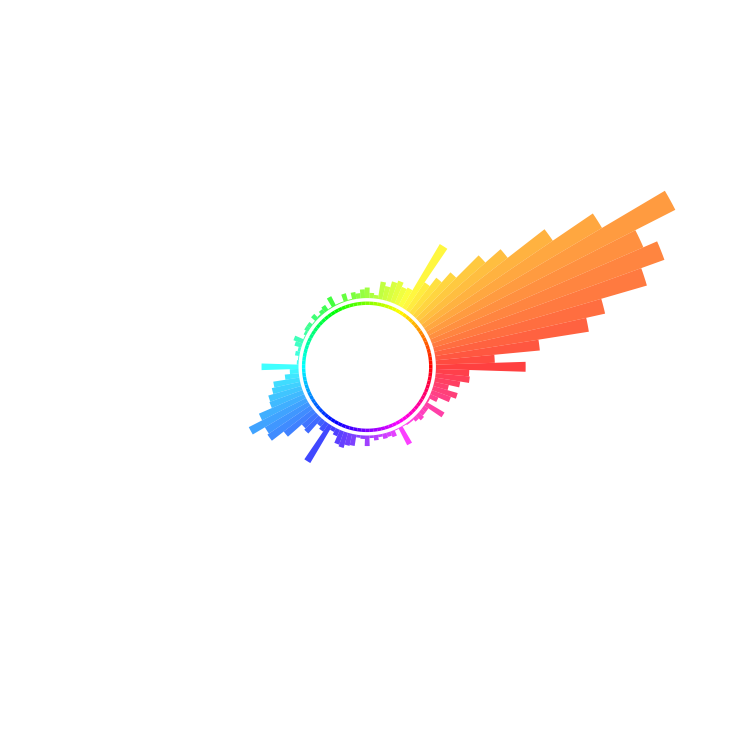

In [62]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

/Users/Marius/Documents/DEV/soan/notebooks/../soan/colors/colors.py:154: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  probs, bons = np.histogram(hlist, normed=1, bins=bins)


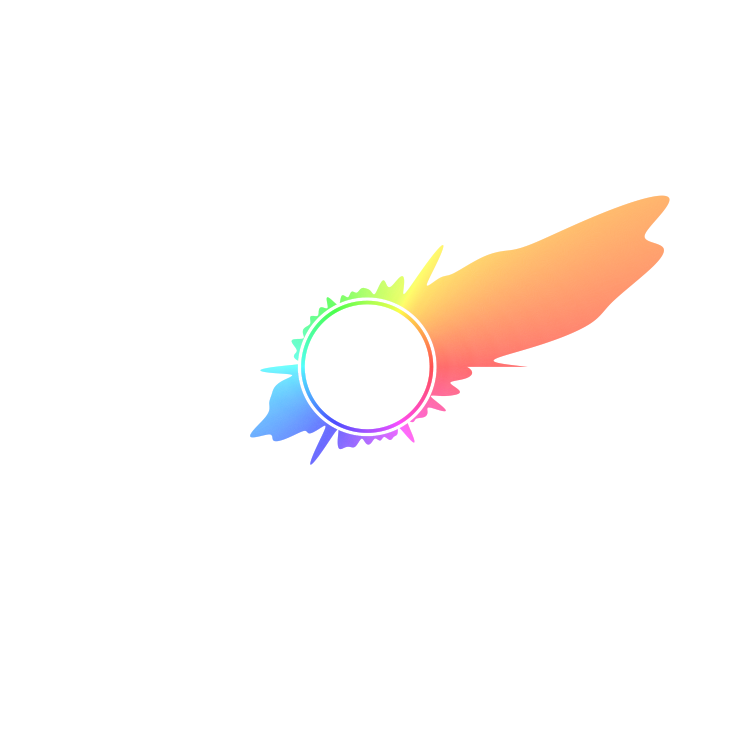

In [63]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)